# Grouping

In this section we will go over the split-apply-combine strategy and the `groupby()` function.

## Learning Objectives

By the end of this lesson students will be able to:

- Understand and apply the Split-Apply-Combine strategy to analyze grouped data
- Use `groupby()` to split a `pandas.DataFrame` by one or more columns
- Calculate summary statistics for groups in a `pandas.DataFrame`
- Use method chaining for efficient data analysis

## About the Data

For this section we will use the Palmer Penguins dataset developed by Drs.Allison Horst, Alison Hill and Kristen Gorman. This dataset contains size measurements for three penguin species in the Palmer Archipelago, Antarctica during 2007, 2008, and 2009.

The dataset has 344 rows and 8 columns. Let's start by loading the data:

In [2]:
import numpy as np
import pandas as pd

# Load Palmer penguins data
URL = 'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv'
penguins = pd.read_csv(URL)

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


## Summary Statistics

It is easy to get summary stastics for each column in a `pandas.DataFrame` by using methods such as

- `sum()`: sum values in each column
- `count()`: count non-NA values in each column
- `min()` and `max()`: get the minimum and maximum value in each column
- `mean()` and `median()`: get the mean and median value in each column
- `std()` and `var()`: get the standard deviation and variance in each column

## Example

In [2]:
# Get the number of non-NA values in each column 
penguins.count()

species              344
island               344
bill_length_mm       342
bill_depth_mm        342
flipper_length_mm    342
body_mass_g          342
sex                  333
year                 344
dtype: int64

In [3]:
# Get minimum value in each column with numerical values
penguins.select_dtypes('number').min()

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                 2007.0
dtype: float64

## Grouping

Our penguins data is naturally split into different groups: there are three different species, two sexes, and three islands. Often, we want to calculate a certain statistic for each group. For example, suppose we want to calculate the average flipper length per species. How would we do this “by hand”?

0. We start with our data and notice there are multiple `species` in the species column.

1. We split our original table to group all observations from the same species together.

2. We calculate the average flipper length for each of the groups we formed.

3. Then we combine the values for average flipper length per species into a single table.

This is known as the **Split-Apply-Combine strategy**. This strategy follows the three steps we explained above:

1. **Split**: Split the data into logical groups (e.g. species, sex, island, etc.)

2. **Apply**: Calculate some summary statistic on each group (e.g. average flipper length by species, number of individuals per island, body mass by sex, etc.)

3. **Combine**: Combine the statistic calculated on each group back together.

For a `pandas.DataFrame` or `pandas.Series`, we can use the `groupby()` method to split (i.e. group) the data into different categories.

The general syntax for `groupby()` is:
```python
df.groupby(columns_to_group_by).summary_method()
```

Most often, we will have that `columns_to_group_by` will be a single column name (a string) or a list of column names. The unique values of the column (or columns) will be used as the groups of the data frame.

### Example

If we don’t use `groupby()` and directly apply the `mean()` method to our flipper length column, we obtain the average of all the values in the column:

In [3]:
penguins['flipper_length_mm'].mean()

200.91520467836258

To get the mean flipper length by species we first group our dataset by the species column’s values. However, if we just use the `groupby()` method without specifying what we wish to calculate on each group, not much happens up front:

In [4]:
penguins.groupby('species')['flipper_length_mm']

We get a `GroupBy` object, which is like an intermediate step. It doesn’t perform the actual calculations until we specify an operation:

In [5]:
# Average flipper length per species
penguins.groupby('species')['flipper_length_mm'].mean()

species
Adelie       189.953642
Chinstrap    195.823529
Gentoo       217.186992
Name: flipper_length_mm, dtype: float64

Let’s recap what went on in that line (remember the . can be read as “and then…”):

- start with the `penguins` data frame, and then…

- use `groupby()` to group the data frame by species values, and then…

- select the `'flipper_length_mm'` column, and then…

- calculate the `mean()` of this column with respect to the groups.

Notice that the name of the series is the same as the column on which we calculated the summary statistc. We can easily update this using the `rename()` method:

In [6]:
# Average flipper length per species
avg_flipper = (penguins.groupby("species")
                        .flipper_length_mm
                        .mean()
                        .rename('mean_flipper_length')
                        .sort_values(ascending=False)
                        )
avg_flipper

species
Gentoo       217.186992
Chinstrap    195.823529
Adelie       189.953642
Name: mean_flipper_length, dtype: float64

We can also group by combinations of columns.

### Example

We want to know what was the number of penguins surveyed in each island on different years. We can use the `count()` method to count the number of non-NA values in each column like this:

In [7]:
penguins.count()

species              344
island               344
bill_length_mm       342
bill_depth_mm        342
flipper_length_mm    342
body_mass_g          342
sex                  333
year                 344
dtype: int64

When we group by island and year we get the count of non-NA values for each column across each combination of island and year:

In [8]:
penguins.groupby(['island','year']).count()

species  bill_length_mm  bill_depth_mm  flipper_length_mm  \
island    year                                                              
Biscoe    2007       44              44             44                 44   
          2008       64              64             64                 64   
          2009       60              59             59                 59   
Dream     2007       46              46             46                 46   
          2008       34              34             34                 34   
          2009       44              44             44                 44   
Torgersen 2007       20              19             19                 19   
          2008       16              16             16                 16   
          2009       16              16             16                 16   

                body_mass_g  sex  
island    year                    
Biscoe    2007           44   43  
          2008           64   63  
          2009           59   57  
Dream     2007           46   45  
          2008           34   34  
          2009           44   44  
Torgersen 2007           19   15  
          2008           16   16  
          2009           16   16

Let’s say we want to plot the surveyed population per year and island. We could then use method chaining to do this:

<AxesSubplot:title={'center':'Penguins surveyed at the Palmer Archipelago'}, ylabel='island,year'>

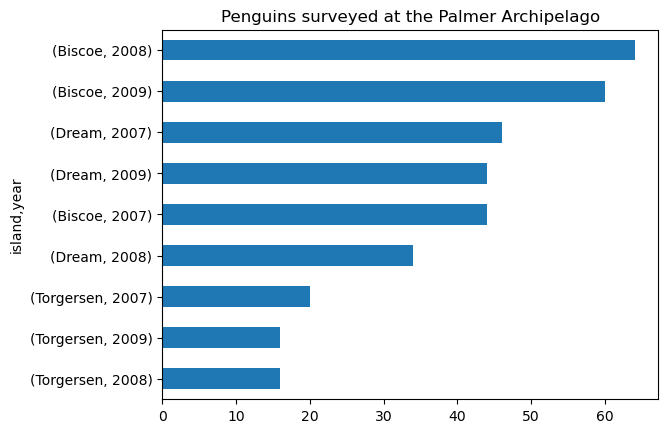

In [9]:
(penguins.groupby(['island','year'])
         .count()
         .species
         .sort_values()
         .plot(kind='barh',
                title='Penguins surveyed at the Palmer Archipelago',
                ylabel=('Island, Year'))
         )

### Check-in

1. Use the `max()` method for `pands.DataFrames` to calculate the maximum value of a penguin’s body mass by year and species.

In [11]:
# Calculate maximum penguin body mass by year and species
penguin_max = penguins.groupby(['year','species']).max()

penguin_max

/tmp/ipykernel_1704528/3404309005.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  penguin_max = penguins.groupby(['year','species']).max()


island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
year species                                                                  
2007 Adelie     Torgersen            46.0           21.5              198.0   
     Chinstrap      Dream            58.0           20.3              201.0   
     Gentoo        Biscoe            59.6           17.0              230.0   
2008 Adelie     Torgersen            45.8           21.1              208.0   
     Chinstrap      Dream            54.2           20.8              210.0   
     Gentoo        Biscoe            54.3           17.3              231.0   
2009 Adelie     Torgersen            45.6           20.7              210.0   
     Chinstrap      Dream            55.8           19.9              212.0   
     Gentoo        Biscoe            55.9           17.3              230.0   

                body_mass_g  
year species                 
2007 Adelie          4675.0  
     Chinstrap       4400.0  
     Gentoo          6300.0  
2008 Adelie          4700.0  
     Chinstrap       4800.0  
     Gentoo          6000.0  
2009 Adelie          4775.0  
     Chinstrap       4450.0  
     Gentoo          6000.0

2. Use (1) to display the highest body masses per year and species as a bar plot in descending order.

<AxesSubplot:title={'center':'Penguins surveyed at the Palmer Archipelago'}, ylabel='year,species'>

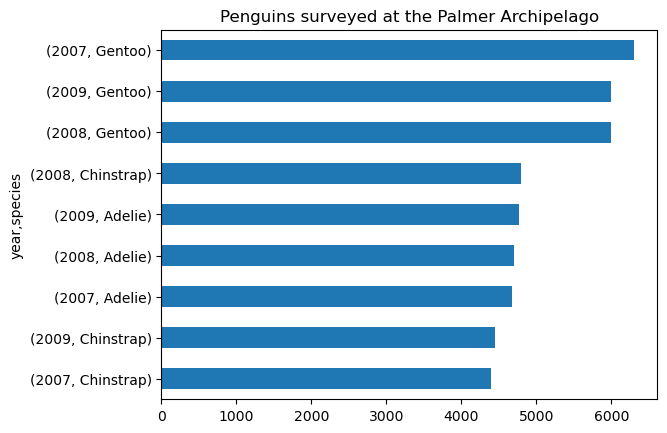

In [13]:
(penguin_max.body_mass_g
            .sort_values()
            .plot(kind='barh',
                title='Penguins surveyed at the Palmer Archipelago',
                ylabel=('Island, Year'))
         )